In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ['This is the first sentence.',
             'This one is the second sentence.',
             'And this is the third one.',
             'Is this the first sentence?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# X.torray() is BoW
print(X.toarray())

[[0 1 1 0 0 1 1 0 1]
 [0 0 1 1 1 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 0 1 1 0 1]]


In [18]:
from string import punctuation
words = []
wordsDict = {}
for line in documents:
    words = line.split(" ")
    for word in words:
        word = ''.join(c for c in word if c not in punctuation)
        word = word.lower()
        if word not in wordsDict:
            wordsDict[word] = 1
        else:
            wordsDict[word] += 1
# print(wordsDict)

keys = wordsDict.keys()

lines = []
for line in documents:
    words = line.split(" ")
    lineArray = []
    
    for word in words:
        word = ''.join(c for c in word if c not in punctuation)
        lineArray.append(word)
    lines.append(lineArray)
print(lines)

results = []
words = []
wordsDict = {}
for line in lines:
#     words = line.split(" ")
    for word in words:
        #word = ''.join(c for c in word if c not in punctuation)
        word = word.lower()
        if word not in wordsDict:
            wordsDict[word] = 1
        else:
            wordsDict[word] += 1
    for key in keys:
        if key in wordsDict:
                pass
    wordsDict = {}
#did not finish, but basically was there. just had to iterate through the lines array and count the occurences and then overwrite the each line in lines with the occurences according to the order in keys.   

[['This', 'is', 'the', 'first', 'sentence'], ['This', 'one', 'is', 'the', 'second', 'sentence'], ['And', 'this', 'is', 'the', 'third', 'one'], ['Is', 'this', 'the', 'first', 'sentence']]


In [19]:
# Get the unique words
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'one', 'second', 'sentence', 'the', 'third', 'this']


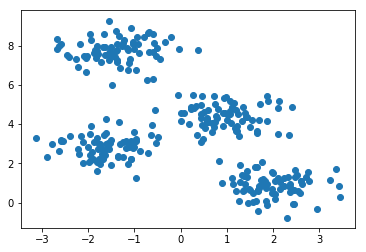

In [23]:
# from figures import plot_kmeans_interactive

# plot_kmeans_interactive()
# figure's won't import

from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4,
                          random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1])

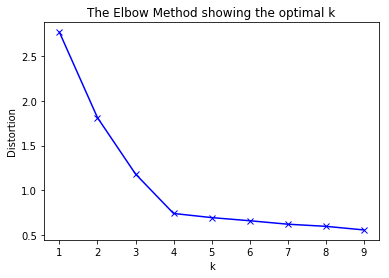

In [24]:
import numpy as np
from scipy.spatial import distance

distortions = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    distortions.append(sum(np.min(distance.cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
print(vectorizer.get_feature_names())
print(X.shape)
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++')
model.fit(X)
# print('M:')
# print(model.cluster_centers_.argsort())
# print(model.cluster_centers_.argsort()[:, ::-1])
# print("Top terms per cluster:")
# order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# for i in range(true_k):
#     print("Cluster %d:" % i),
#     for ind in order_centroids[i, :10]:
#         print(' %s' % terms[ind]),


# print("\n")
# print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
print('Y:')
print(Y.toarray())
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

['100', 'app', 'belly', 'best', 'came', 'cat', 'chrome', 'climbing', 'eating', 'extension', 'face', 'feedback', 'google', 'impressed', 'incredible', 'key', 'kitten', 'kitty', 'little', 'map', 'merley', 'ninja', 'open', 'photo', 'play', 'promoter', 'restaurant', 'smiley', 'squooshy', 'tab', 'taken', 'translate', 've']
(8, 33)
Y:
[[0.         0.         0.         0.         0.         0.
  0.70710678 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.70710678 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
[0]
[1]


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import warnings


def plot_venn_diagram():
    fig, ax = plt.subplots(subplot_kw=dict(frameon=False, xticks=[], yticks=[]))
    ax.add_patch(plt.Circle((0.3, 0.3), 0.3, fc='red', alpha=0.5))
    ax.add_patch(plt.Circle((0.6, 0.3), 0.3, fc='blue', alpha=0.5))
    ax.add_patch(plt.Rectangle((-0.1, -0.1), 1.1, 0.8, fc='none', ec='black'))
    ax.text(0.2, 0.3, '$x$', size=30, ha='center', va='center')
    ax.text(0.7, 0.3, '$y$', size=30, ha='center', va='center')
    ax.text(0.0, 0.6, '$I$', size=30)
    ax.axis('equal')


def plot_example_decision_tree():
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_axes([0, 0, 0.8, 1], frameon=False, xticks=[], yticks=[])
    ax.set_title('Example Decision Tree: Animal Classification', size=24)

    def text(ax, x, y, t, size=20, **kwargs):
        ax.text(x, y, t,
                ha='center', va='center', size=size,
                bbox=dict(boxstyle='round', ec='k', fc='w'), **kwargs)

    text(ax, 0.5, 0.9, "How big is\nthe animal?", 20)
    text(ax, 0.3, 0.6, "Does the animal\nhave horns?", 18)
    text(ax, 0.7, 0.6, "Does the animal\nhave two legs?", 18)
    text(ax, 0.12, 0.3, "Are the horns\nlonger than 10cm?", 14)
    text(ax, 0.38, 0.3, "Is the animal\nwearing a collar?", 14)
    text(ax, 0.62, 0.3, "Does the animal\nhave wings?", 14)
    text(ax, 0.88, 0.3, "Does the animal\nhave a tail?", 14)

    text(ax, 0.4, 0.75, "> 1m", 12, alpha=0.4)
    text(ax, 0.6, 0.75, "< 1m", 12, alpha=0.4)

    text(ax, 0.21, 0.45, "yes", 12, alpha=0.4)
    text(ax, 0.34, 0.45, "no", 12, alpha=0.4)

    text(ax, 0.66, 0.45, "yes", 12, alpha=0.4)
    text(ax, 0.79, 0.45, "no", 12, alpha=0.4)

    ax.plot([0.3, 0.5, 0.7], [0.6, 0.9, 0.6], '-k')
    ax.plot([0.12, 0.3, 0.38], [0.3, 0.6, 0.3], '-k')
    ax.plot([0.62, 0.7, 0.88], [0.3, 0.6, 0.3], '-k')
    ax.plot([0.0, 0.12, 0.20], [0.0, 0.3, 0.0], '--k')
    ax.plot([0.28, 0.38, 0.48], [0.0, 0.3, 0.0], '--k')
    ax.plot([0.52, 0.62, 0.72], [0.0, 0.3, 0.0], '--k')
    ax.plot([0.8, 0.88, 1.0], [0.0, 0.3, 0.0], '--k')
    ax.axis([0, 1, 0, 1])


def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None):
    estimator.fit(X, y)

    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='rainbow')
    plt.clim(y.min(), y.max())

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
    plt.axis('off')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    plt.clim(y.min(), y.max())
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i < 0:
            return

        tree = estimator.tree_
        
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())


def plot_tree_interactive(X, y):
    from sklearn.tree import DecisionTreeClassifier

    def interactive_tree(depth=1):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        visualize_tree(clf, X, y)

    from ipywidgets import interact
    return interact(interactive_tree, depth=(1, 5))


def plot_kmeans_interactive(min_clusters=1, max_clusters=6):
    from ipywidgets import interact
    from sklearn.metrics.pairwise import euclidean_distances
    from sklearn.datasets.samples_generator import make_blobs

    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')

        X, y = make_blobs(n_samples=300, centers=4,
                          random_state=0, cluster_std=0.60)

        def _kmeans_step(frame=0, n_clusters=4):
            rng = np.random.RandomState(2)
            labels = np.zeros(X.shape[0])
            centers = rng.randn(n_clusters, 2)

            nsteps = frame // 3

            for i in range(nsteps + 1):
                old_centers = centers
                if i < nsteps or frame % 3 > 0:
                    dist = euclidean_distances(X, centers)
                    labels = dist.argmin(1)

                if i < nsteps or frame % 3 > 1:
                    centers = np.array([X[labels == j].mean(0)
                                        for j in range(n_clusters)])
                    nans = np.isnan(centers)
                    centers[nans] = old_centers[nans]


            # plot the data and cluster centers
            plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='rainbow',
                        vmin=0, vmax=n_clusters - 1);
            plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o',
                        c=np.arange(n_clusters),
                        s=200, cmap='rainbow')
            plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o',
                        c='black', s=50)

            # plot new centers if third frame
            if frame % 3 == 2:
                for i in range(n_clusters):
                    plt.annotate('', centers[i], old_centers[i], 
                                 arrowprops=dict(arrowstyle='->', linewidth=1))
                plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                            c=np.arange(n_clusters),
                            s=200, cmap='rainbow')
                plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                            c='black', s=50)

            plt.xlim(-4, 4)
            plt.ylim(-2, 10)

            if frame % 3 == 1:
                plt.text(3.8, 9.5, "1. Reassign points to nearest centroid",
                         ha='right', va='top', size=14)
            elif frame % 3 == 2:
                plt.text(3.8, 9.5, "2. Update centroids to cluster means",
                         ha='right', va='top', size=14)

    
    return interact(_kmeans_step, frame=(0, 50),
                    n_clusters=[min_clusters, max_clusters])


def plot_image_components(x, coefficients=None, mean=0, components=None,
                          imshape=(8, 8), n_components=6, fontsize=12):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 5 + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")

    approx = mean.copy()
    show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
    show(1, 2, approx, r'$1 \cdot \mu$')

    for i in range(0, n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + 3, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + 3, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                       transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")


def plot_pca_interactive(data, n_components=6):
    from sklearn.decomposition import PCA
    from ipywidgets import interact

    pca = PCA(n_components=n_components)
    Xproj = pca.fit_transform(data)

    def show_decomp(i=0):
        plot_image_components(data[i], Xproj[i],
                              pca.mean_, pca.components_)
    
    interact(show_decomp, i=(0, data.shape[0] - 1));